In [1]:
from tensorflow.keras.layers import Dense, Activation, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.datasets import cifar10

C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [2]:
(X_train, y_train),(X_test,y_test)= cifar10.load_data()

In [5]:
#Normalizing pixel values between 0 and 1
X_train, y_train= X_train/255.0, y_train/255.0

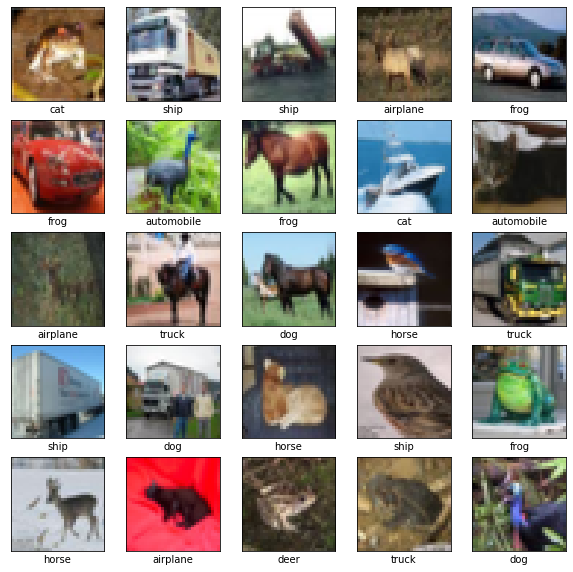

In [12]:
class_names=['airplane','automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']

from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i][0]])
plt.show()

In [16]:
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [21]:
import tensorflow as tf
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train , validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.0043 - accuracy: 0.1000 - val_loss: 27507.0840 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3842e-12 - accuracy: 0.1000 - val_loss: 27507.1426 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3842e-12 - accuracy: 0.1000 - val_loss: 27507.2578 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 2.3842e-12 - accuracy: 0.1000 - val_loss: 27507.5547 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 2.3842e-12 - accuracy: 0.1000 - val_loss: 27508.0039 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 2.3842e-12 - accuracy: 0.1000 - val_loss: 27508.8359 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 2.

In [24]:
model.evaluate(X_test)

313/313 [==============================] - 0s 973us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [1]:
import tensorflow as tf
import os

C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [2]:
import cProfile

In [3]:
tf.executing_eagerly()

True

In [4]:
x= [[2.]]
m =tf.matmul(x,x)
print("Hello, {}".format(m))

Hello, [[4.]]


In [5]:
#Enabling eager execution changes how tensorflow operations behave now they immediately evaluate and return values their values to python
#tf.Tensor objects reference concrete values instead of symbolic handles to node in a computational graph.Since there isn't a computational graph to build and run later in a session
#It is easy to inspect results with the print() or a debugger
a = tf.constant([[1,2],
                 [3,4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [6]:
b = tf.add(a,1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [7]:
print(a*b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [9]:
import numpy as np
c =np.multiply(a,b)
print(c)

[[ 2  6]
 [12 20]]


In [1]:
#Usage of estimators 
import tensorflow as tf
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [9]:
dataset = pd.read_csv(r'C:\Users\USER\Downloads\iris_csv.csv')

In [10]:
dataset

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
from sklearn.model_selection import train_test_split
X = dataset.drop('class', axis=1)
y = dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
def input_fn(features , labels, training=True, batch=256):
    dataset = tf.data.Dataset.from_tensor_slices(dict(features), labels)
    
    if training:
        dataset = dataset.shuffle(1000).repeat()
        
    return dataset(batch(batch_size))

In [24]:
my_feature_columns =[]
for key in X_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

In [25]:
classifier = tf.estimator.DNNClassifier(feature_columns =my_feature_columns, hidden_units=[30,10], n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\USER\\AppData\\Local\\Temp\\tmpif7fso7w', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [27]:
classifier.train(input_fn=lambda: input_fn(X_train, y_train, training=True), steps=5000)

TypeError: from_tensor_slices() takes 1 positional argument but 2 were given

In [ ]:
classifier.evaluate(input_fn = lambda: input_fn(X_test, y_test))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
NAME  = "mnist-data-cnn-64x2-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
(X_train, y_train), (X_test, y_test) = mnist.load_data()

training_samples, height, width = X_train.shape
testing_samples, _,_ = X_test.shape

print("Training_samples", training_samples)
print("Testing_samples", testing_samples)
print("Height"+ str(height)+ "x width"+str(width))

Training_samples 60000
Testing_samples 10000
Height28x width28


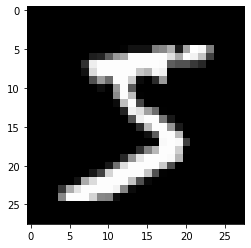

In [3]:
plt.imshow(X_train[0],cmap='gray', interpolation='none')

In [4]:
#For CNN we will need the data in heightXwidthXchannels form since the image is in gray scale we will use channel 1
X_train =X_train.reshape(training_samples, height, width, 1).astype(np.float32)
X_test= X_test.reshape(testing_samples, height, width, 1).astype(np.float32)

In [5]:
#To improve the training process we would need to standardise or normalise the values we can achieve this using a simple divide by 256 for or values
X_train=X_train/255
X_test=X_test/255

In [6]:
#Total number of digits
target_classes=10
#Numbers 0-9 so ten classes
n_classes = np.arange(10)

In [7]:
#Designing the model
model=Sequential()
model.add(Conv2D(64, (5,5), input_shape=(height, width, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs =10, verbose=2, callbacks=[tensorboard])

Epoch 1/10
1875/1875 - 75s - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 2/10
1875/1875 - 74s - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 3/10
1875/1875 - 75s - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 4/10
1875/1875 - 75s - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 5/10
1875/1875 - 75s - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 6/10
1875/1875 - 75s - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 7/10
1875/1875 - 74s - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 8/10
1875/1875 - 78s - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
Epoch 9/10
1875/1875 - 79s - loss: 0.0000e+00 - accuracy: 0.1124 - val_loss: 0.0000e+00 - val_accuracy: 0.1135
E

In [10]:
pred = model.evaluate(X_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
